## Оглавление<a id="heading"></a>
1. [Ознакомление с данными](#1)
2. [Обработка колонок](#2)
3. [Генерация признаков](#3)
4. [Отбор признаков](#4)
5. [Прогнозирование таргета](#5)

##  1. Ознакомление с данными<a id="1"></a>
[Обработка колонок с текстом▼](#2) [Оглавление▲▲](#heading)

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import catboost
from catboost import *

import shap
shap.initjs()

import gensim 
from gensim.models import Word2Vec
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import RegexpTokenizer
import nltk

from IPython.core.interactiveshell import InteractiveShell    
InteractiveShell.ast_node_interactivity = "all"  

pd.options.display.max_columns=500        
pd.options.display.max_rows=1000     

plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize']=(20, 5)
import warnings; warnings.filterwarnings(action='ignore')

In [54]:
path = '/home/user/ds_bootcamp/хакатон/data/'
train = pd.read_csv(f'{path}train.csv')
test = pd.read_csv(f'{path}test.csv')
train.shape, test.shape
train_1 = train.copy()
test_1 = test.copy()
train.head(1)
test.head(1)

((279792, 77), (2974, 76))

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
0,Пермь,NaN,COL_0,57.998207,56.292797,4,19,35,52,0,0,0,0,0,2,4,6,3.29347,Пермь,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,0,0,0,1,2,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.5,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0


,city,floor,id,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,lat,lng,total_square,street,date,realty_type,price_type
0,Курск,1.0,COL_289284,7,55,85,117,0,0,0,0,0,2,6,10,4.101661,Курск,443212.0,0.147072,0,7,7,19,0,0,0,0,1,2,3,3,5,5,5,2,2,4,7,7,8,0,0,1,0,0,0,1,5,36,61,83,435.363535,5.636811,0,0,0,0.108668,11,15,27,184,78,1997.0,743.0,4.325,4.211268,1966.471591,1966.74026,Курская область,51.709255,36.147908,156.148996,S6983,2020-09-06,100,1


In [55]:
train = train[train['price_type']==1]
train.shape

(4493, 77)

In [56]:
df = pd.concat([train, test])
df.rename(columns={'per_square_meter_price':'target'}, inplace=True)
mask = df['target'].notnull()

In [57]:
df_nan = pd.DataFrame(df.loc[:, df.isna().any()].isna().sum().sort_values(ascending=False), columns=['NaN count'])
df_nan['NaN %'] =  df_nan.apply(lambda x: round(x * 100 / len(df), 3))
df_nan

,NaN count,NaN %
floor,3765,50.422
target,2974,39.829
reform_mean_floor_count_500,126,1.687
reform_mean_year_building_500,124,1.661
reform_house_population_500,116,1.554
reform_mean_floor_count_1000,98,1.312
reform_mean_year_building_1000,96,1.286
reform_house_population_1000,90,1.205
street,23,0.308
osm_city_nearest_population,1,0.013


##  2. Обработка колонок<a id="2"></a>
[Первичный отбор признаков▼](#3) [Оглавление▲▲](#heading)

In [58]:
df['street'].unique()
df['street'] = df['street'].fillna('A')

array(['S5845', 'S27968', 'S23597', ..., 'S30314', 'S8521', 'S34005'],
      dtype=object)

In [59]:
df['region'].replace('Алтай', 'Алтайский край', inplace=True)
df['floor'] = df['floor'].str.lower()
df['floor'].unique()

array([nan, '2.0', '1', '-1.0', '1.0', '3.0', '18.0', 'подвал, 1', '2',
       '4.0', 'подвал', 'цоколь, 1', '1,2,антресоль', '5.0', '6.0',
       'цоколь', '9.0', '4', '5', 'тех.этаж (6)', '3', '10',
       'фактически на уровне 1 этажа', '6', '1,2,3', '1, подвал',
       '1,2,3,4', '1,2', '1,2,3,4,5', '5, мансарда', '-2.0', '10.0',
       '1-й, подвал', '12', '15', '13', '1, подвал, антресоль', '16.0',
       'мезонин', 'подвал, 1-3', '8', '7', '15.0', '1 (цокольный этаж)',
       '3, мансарда (4 эт)', 'подвал,1', '1, антресоль', '1-3',
       'мансарда (4эт)', '1, 2.', '9', '7.0', 'подвал , 1 ', '1, 2',
       'подвал, 1,2,3', '0.0', '1 + подвал (без отделки)', 'мансарда',
       '2,3', '4, 5', '1-й, 2-й', '18', '1 этаж, подвал', '17.0',
       '1, цоколь', 'подвал, 1-7, техэтаж', '3 (антресоль)', '1, 2, 3',
       'цоколь, 1,2(мансарда)', 'подвал, 3. 4 этаж', 'подвал, 1-4 этаж',
       'подва, 1.2 этаж', '2, 3', '-1', '1.2', '11', '36', '7,8',
       '1 этаж', '1-й', '3 этаж', '4 э

In [60]:
floor_1 = ['фактически на уровне 1 этажа', '1 этаж', '1 (по док-м цоколь)', '1-й', '1', '1.0']
floor_2 = ['подвал, 1', 'цоколь, 1', '1,2,антресоль', '1,2,3', '1, подвал', '1,2,3,4', '1,2', '1,2,3,4,5',
          '1-й, подвал', '1, подвал, антресоль', 'подвал, 1-3', 'подвал,1', '1, антресоль', '1-3', 
           'подвал , 1 ', '1, 2', 'подвал, 1,2,3', '1 + подвал (без отделки)', '1-й, 2-й', '1 этаж, подвал', 
           '1, цоколь', 'подвал, 1-7, техэтаж', '1, 2, 3', 'цоколь, 1,2(мансарда)', 'подвал, 1-4 этаж', 
           'подва, 1.2 этаж', '1.2', 'подвал,1,2,3,4,5', 'подвал, цоколь, 1 этаж', 'цоколь, 1, 2,3,4,5,6', 
           ' 1, 2, антресоль', '1,2', 'подвал, 1 и 4 этаж', ' 1-2, подвальный', '1, 2, 3, мансардный', 
           'подвал, 1, 2, 3', '1,2,3, антресоль, технический этаж', '1-7', '1,2,подвал ','1, 2 этаж', 
           '1-3 этажи, цоколь (188,4 кв.м), подвал (104 кв.м)', '1,2,3,4, подвал', 'подвал, 1, 2', 'подвал,1,2,3',
           '1,2,3 этаж, подвал', 'цокольный, 1,2', '1,2 ', '1, 2.']
floor_цоколь = ['цоколь', '1 (цокольный этаж)', 'цокольный', '0', '0.0']
floor_подвал = ['подвал', '-1', 'техническое подполье', '-1.0', '-1', '-2.0']
floor_multy = ['5, мансарда', '3, мансарда (4 эт)', '2,3', '4, 5', 'подвал, 3. 4 этаж', '2, 3', '7,8',  
               '3, мансарда', '3 этаж, мансарда (4 этаж)', '3,4', 'технический этаж,5,6', '3, 4', 'подвал, 2', 
               '2, 3, 4, тех.этаж']
floor_high = ['тех.этаж (6)', 'мансарда (4эт)', '3 (антресоль)', '3 этаж', '4 этаж', '5 этаж',
              '5(мансарда)', '3.0', '18.0', '4.0', '5.0', '6.0', '9.0', '4', '5', '3', '10', '6', '10.0', '12', 
              '15', '13', '16.0', '8', '7', '15.0', '9', '7.0', '18', '17.0', '11', '36', '29', '11.0', '12.0', 
              '14', '8.0', '13.0', 'мезонин', 'мансарда', '2-й', '2.0', '2']

In [61]:
df['floor'] = ['A' if i in floor_1 else i for i in df['floor']]
df['floor'] = ['B' if i in floor_2 else i for i in df['floor']]
df['floor'] = ['C' if i in floor_цоколь else i for i in df['floor']]
df['floor'] = ['D' if i in floor_подвал else i for i in df['floor']]
df['floor'] = ['E' if i in floor_multy else i for i in df['floor']]
df['floor'] = ['F' if i in floor_high else i for i in df['floor']]
df['floor'] = df['floor'].fillna('G')

In [62]:
df['realty_type'].unique()
df.loc[df['realty_type'] == 10, 'realty_type'] = 'A'
df.loc[df['realty_type'] == 100, 'realty_type'] = 'B'
df.loc[df['realty_type'] == 110, 'realty_type'] = 'C'

array([110,  10, 100])

In [63]:
df['city'].nunique()
reg_tok = RegexpTokenizer('\w+')

238

In [64]:
def clean_and_lemmatize(text):
    
    text = text.lower()
    text = re.sub(r'http\S+', " ", text)
    text = re.sub(r'@\w+',' ',text)
    text = re.sub(r'#\w+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub('r<.*?>',' ', text)
    text = reg_tok.tokenize(text)
    
    text = " ".join([word for word in text if len(word) > 2])
    
    text = WordNetLemmatizer().lemmatize(text)
    text = ' '.join(text.split())
    
    return text

In [65]:
df['lemma_city'] = df['city'].apply(clean_and_lemmatize)
df.head(1)

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,target,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,lemma_city
275299,Красноярск,G,COL_62,56.063615,92.958428,0,7,14,26,0,0,0,0,0,0,0,2,7.795659,Красноярск,1095286.0,0.041323,2,6,25,35,0,0,0,2,0,1,2,3,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,5,10,15,1.087101,2.281425,0,0,0,0.052809,7,15,21,103120.69731,95,31,2670.0,940.0,7.136842,7.612903,1976.684211,1980.483871,Красноярский край,106.351104,S5845,2020-01-05,C,1,красноярск


In [66]:
a = pd.DataFrame(df['lemma_city'].value_counts()).reset_index()
a.shape

(238, 2)

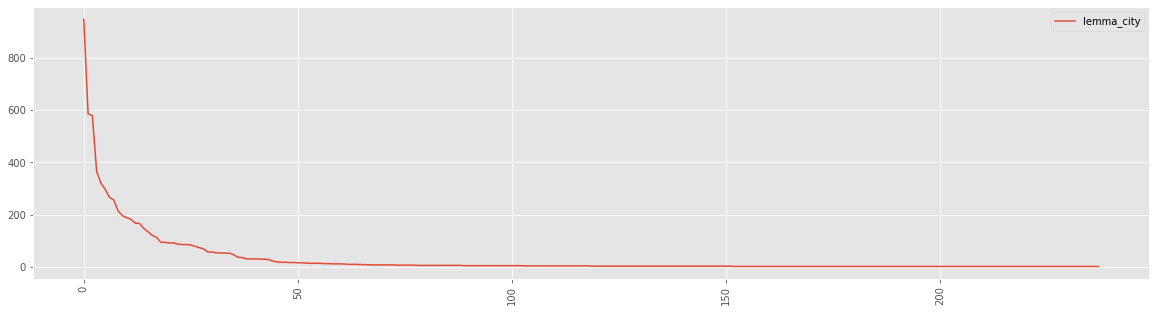

In [67]:
a.plot(kind='line', y='lemma_city')
plt.xticks(rotation=90);

In [68]:
a = a[a['lemma_city'] < 10]['index'].to_list()
df['lemma_city'] = df['lemma_city'].apply(lambda x: 'A' if x in a else x)
df = df.drop('city', axis=1)

In [69]:
missing = ['reform_mean_floor_count_500',
           'reform_mean_year_building_500', 
           'reform_house_population_500',
          'reform_mean_floor_count_1000',
          'reform_mean_year_building_1000',
          'reform_house_population_1000']

for feat in missing:
    df[feat] = df.groupby("lemma_city")[feat].transform(lambda x: x.fillna(x.median()))
    df[feat] = df[feat].fillna(df[feat].median())

df['osm_city_nearest_population'].fillna(df['osm_city_nearest_population'].min(), inplace=True)
df.drop(['id', 'date', 'lng', 'lat', 'price_type'], axis=1, inplace=True)

<AxesSubplot:xlabel='total_square', ylabel='target'>

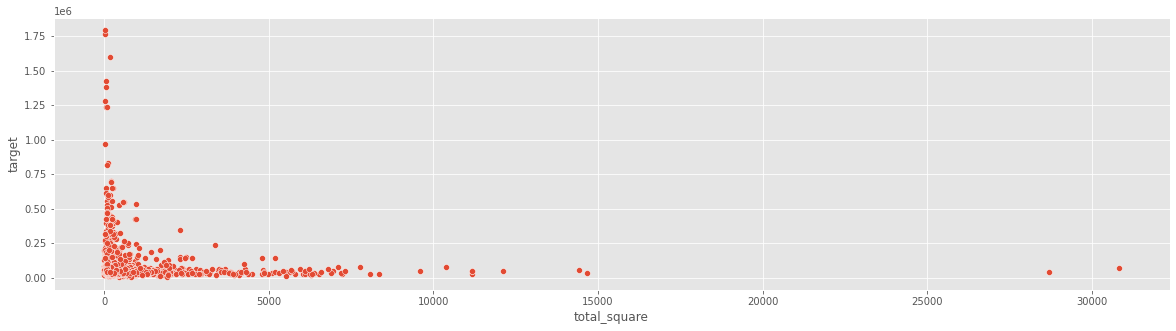

In [70]:
sns.scatterplot('total_square', 'target', data=df);
df['total_square'] = df['total_square'].apply(lambda x: 8000 if x>8000 else x)

##  3. Генерация признаков<a id="3"></a>
[Отбор признаков▼](#4) [Оглавление▲▲](#heading)

In [71]:
group_df = df.groupby(['region', 'lemma_city', 'realty_type'])['total_square'].agg({'sum', 'median', 'max', 'min', 'count'}).reset_index()

In [72]:
def group_feat(row):
    r = row['region'] 
    c = row['lemma_city']
    t = row['realty_type']
    row['min_group'] = group_df.loc[(group_df['region']==r)&(group_df['lemma_city']==c)\
                                    &(group_df['realty_type']==t), 'min'].iloc[0]
    row['max_group'] = group_df.loc[(group_df['region']==r)&(group_df['lemma_city']==c)\
                                    &(group_df['realty_type']==t), 'max'].iloc[0]
    row['sum_group'] = group_df.loc[(group_df['region']==r)&(group_df['lemma_city']==c)\
                                    &(group_df['realty_type']==t), 'sum'].iloc[0]
    row['median_group'] = group_df.loc[(group_df['region']==r)&(group_df['lemma_city']==c)\
                                       &(group_df['realty_type']==t), 'median'].iloc[0]
    row['count_group'] = group_df.loc[(group_df['region']==r)&(group_df['lemma_city']==c)\
                                      &(group_df['realty_type']==t), 'count'].iloc[0]
    return row

df = df.apply(lambda x: group_feat(x), axis=1)

In [73]:
df['total/median_square'] = df['total_square'] / df['median_group']

In [74]:
df.shape
df.head(2)

(7467, 78)

,floor,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,target,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,realty_type,lemma_city,min_group,max_group,sum_group,median_group,count_group,total/median_square
275299,G,0,7,14,26,0,0,0,0,0,0,0,2,7.795659,Красноярск,1095286.0,0.041323,2,6,25,35,0,0,0,2,0,1,2,3,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,5,10,15,1.087101,2.281425,0,0,0,0.052809,7,15,21,103120.697310,95,31,2670.0,940.0,7.136842,7.612903,1976.684211,1980.483871,Красноярский край,106.351104,S5845,C,красноярск,9.418088,8000.000000,43772.324076,115.719127,133,0.919045
275300,G,13,198,345,462,0,0,0,0,4,44,66,89,0.987160,Саратов,842097.0,0.144936,0,4,34,59,0,1,6,9,0,13,22,27,7,17,27,4,7,9,2,5,7,11,16,20,1,11,21,28,8,125,218,286,357.425239,1.924421,0,0,0,0.045451,22,34,45,24874.371004,502,104,4886.0,943.0,4.144608,4.164557,1940.591549,1939.348837,Саратовская область,175.039602,S27968,A,саратов,14.977634,884.168637,18240.258000,249.768696,63,0.700807


##  4. Отбор признаков<a id="4"></a>
[Прогнозирование таргета▼](#5) [Оглавление▲▲](#heading)

In [75]:
y = np.log(df.loc[mask, 'target'])
df = df.drop('target', axis=1)
cat_col = df.select_dtypes(include=['object']).columns.to_list()
num_col = df.select_dtypes(exclude=['object']).columns.to_list()

In [76]:
X = df[mask]
X.shape, y.shape
y_shap = np.exp(y)

((4493, 77), (4493,))

In [77]:
model = CatBoostRegressor(random_state=42)
model.fit(X, y_shap, cat_col,verbose=False, plot=False)

explainer = shap.Explainer(model)
shap_values = explainer(X)

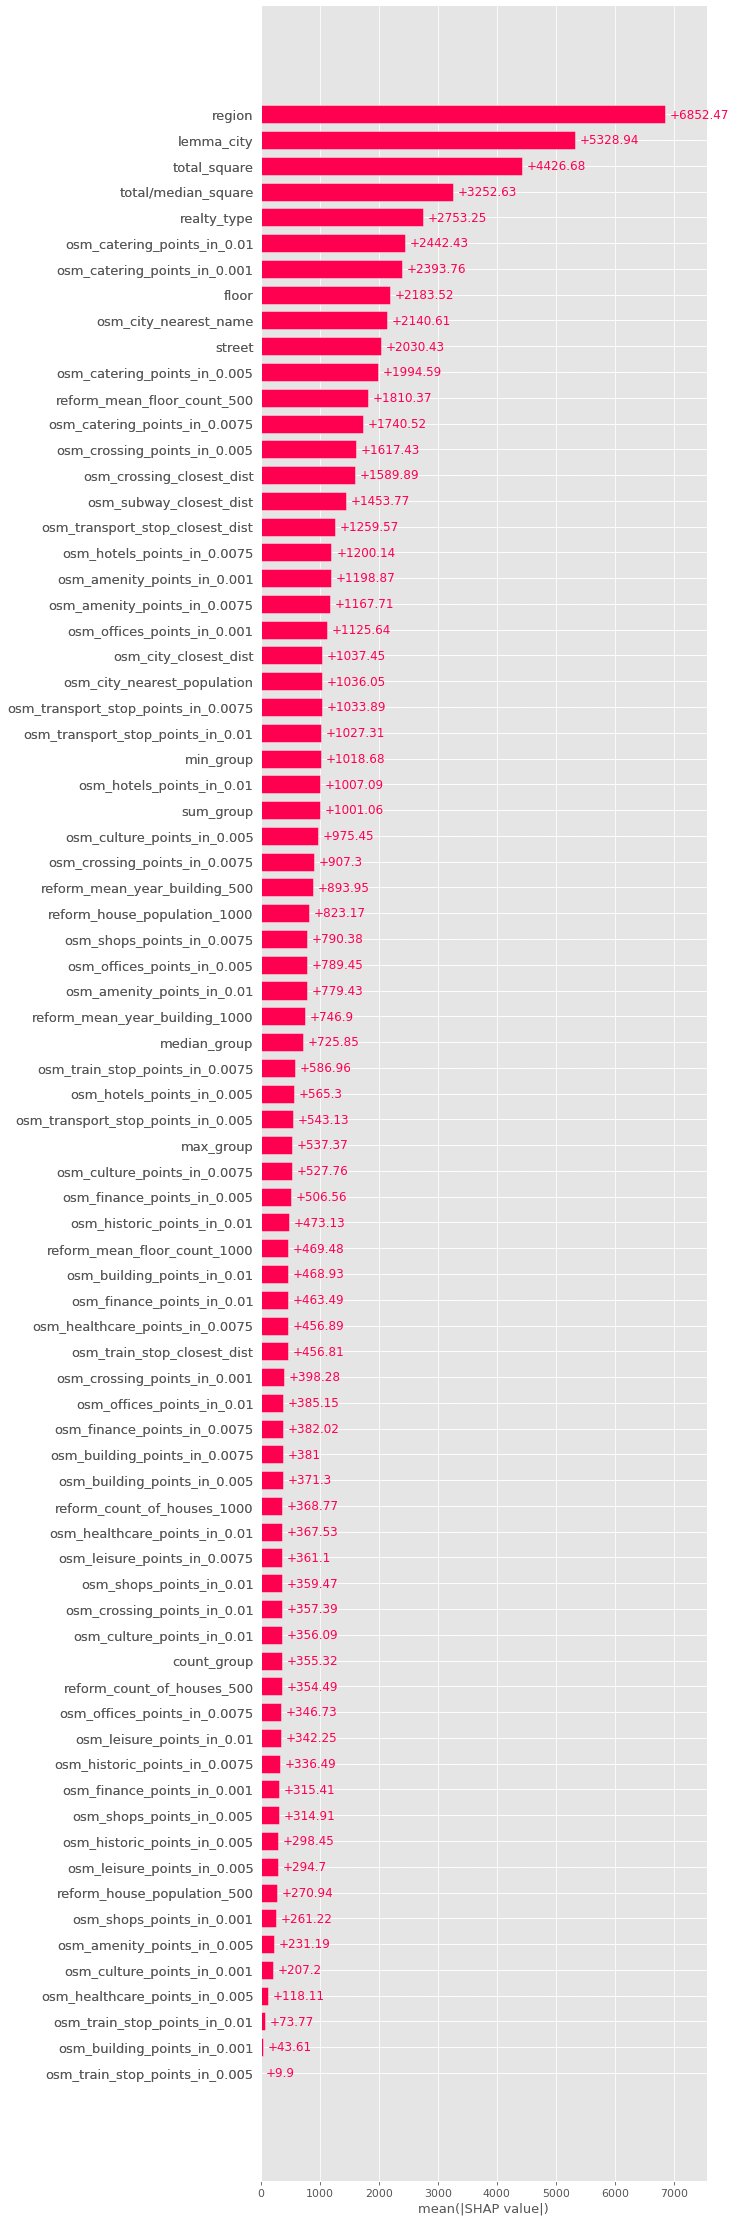

In [78]:
shap.plots.bar(shap_values, max_display=100)

In [79]:
imp = pd.DataFrame(abs(shap_values.values), columns=X.columns).mean(axis=0).sort_values(ascending=False).reset_index()
imp

,index,0
0,region,6852.470023
1,lemma_city,5328.943799
2,total_square,4426.679364
3,total/median_square,3252.634906
4,realty_type,2753.247893
5,osm_catering_points_in_0.01,2442.429602
6,osm_catering_points_in_0.001,2393.759245
7,floor,2183.517397
8,osm_city_nearest_name,2140.610009
9,street,2030.431473


In [80]:
imp = imp[:80]
imp_list = list(imp['index'])
imp_list

['region',
 'lemma_city',
 'total_square',
 'total/median_square',
 'realty_type',
 'osm_catering_points_in_0.01',
 'osm_catering_points_in_0.001',
 'floor',
 'osm_city_nearest_name',
 'street',
 'osm_catering_points_in_0.005',
 'reform_mean_floor_count_500',
 'osm_catering_points_in_0.0075',
 'osm_crossing_points_in_0.005',
 'osm_crossing_closest_dist',
 'osm_subway_closest_dist',
 'osm_transport_stop_closest_dist',
 'osm_hotels_points_in_0.0075',
 'osm_amenity_points_in_0.001',
 'osm_amenity_points_in_0.0075',
 'osm_offices_points_in_0.001',
 'osm_city_closest_dist',
 'osm_city_nearest_population',
 'osm_transport_stop_points_in_0.0075',
 'osm_transport_stop_points_in_0.01',
 'min_group',
 'osm_hotels_points_in_0.01',
 'sum_group',
 'osm_culture_points_in_0.005',
 'osm_crossing_points_in_0.0075',
 'reform_mean_year_building_500',
 'reform_house_population_1000',
 'osm_shops_points_in_0.0075',
 'osm_offices_points_in_0.005',
 'osm_amenity_points_in_0.01',
 'reform_mean_year_building_1

In [81]:
df = df[imp_list]
df.head(2)

,region,lemma_city,total_square,total/median_square,realty_type,osm_catering_points_in_0.01,osm_catering_points_in_0.001,floor,osm_city_nearest_name,street,osm_catering_points_in_0.005,reform_mean_floor_count_500,osm_catering_points_in_0.0075,osm_crossing_points_in_0.005,osm_crossing_closest_dist,osm_subway_closest_dist,osm_transport_stop_closest_dist,osm_hotels_points_in_0.0075,osm_amenity_points_in_0.001,osm_amenity_points_in_0.0075,osm_offices_points_in_0.001,osm_city_closest_dist,osm_city_nearest_population,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,min_group,osm_hotels_points_in_0.01,sum_group,osm_culture_points_in_0.005,osm_crossing_points_in_0.0075,reform_mean_year_building_500,reform_house_population_1000,osm_shops_points_in_0.0075,osm_offices_points_in_0.005,osm_amenity_points_in_0.01,reform_mean_year_building_1000,median_group,osm_train_stop_points_in_0.0075,osm_hotels_points_in_0.005,osm_transport_stop_points_in_0.005,max_group,osm_culture_points_in_0.0075,osm_finance_points_in_0.005,osm_historic_points_in_0.01,reform_mean_floor_count_1000,osm_building_points_in_0.01,osm_finance_points_in_0.01,osm_healthcare_points_in_0.0075,osm_train_stop_closest_dist,osm_crossing_points_in_0.001,osm_offices_points_in_0.01,osm_finance_points_in_0.0075,osm_building_points_in_0.0075,osm_building_points_in_0.005,reform_count_of_houses_1000,osm_healthcare_points_in_0.01,osm_leisure_points_in_0.0075,osm_shops_points_in_0.01,osm_crossing_points_in_0.01,osm_culture_points_in_0.01,count_group,reform_count_of_houses_500,osm_offices_points_in_0.0075,osm_leisure_points_in_0.01,osm_historic_points_in_0.0075,osm_finance_points_in_0.001,osm_shops_points_in_0.005,osm_historic_points_in_0.005,osm_leisure_points_in_0.005,reform_house_population_500,osm_shops_points_in_0.001,osm_amenity_points_in_0.005,osm_culture_points_in_0.001,osm_healthcare_points_in_0.005,osm_train_stop_points_in_0.01,osm_building_points_in_0.001,osm_train_stop_points_in_0.005
275299,Красноярский край,красноярск,106.351104,0.919045,C,2,0,G,Красноярск,S5845,0,7.612903,0,6,0.041323,1.087101,0.052809,0,0,14,0,7.795659,1095286.0,15,21,9.418088,0,43772.324076,0,25,1980.483871,2670.0,10,0,26,1976.684211,115.719127,0,0,7,8000.000000,0,1,1,7.136842,0,3,0,2.281425,2,0,2,0,0,95,0,1,15,35,2,133,31,0,1,0,0,5,0,1,940.0,0,7,0,0,0,0,0
275300,Саратовская область,саратов,175.039602,0.700807,A,89,4,G,Саратов,S27968,44,4.164557,66,4,0.144936,357.425239,0.045451,5,13,345,1,0.987160,842097.0,34,45,14.977634,7,18240.258000,1,34,1939.348837,4886.0,218,11,462,1940.591549,249.768696,0,2,22,884.168637,6,13,9,4.144608,0,27,17,1.924421,0,28,22,0,0,502,27,16,286,59,9,63,104,21,20,7,0,125,4,11,943.0,8,198,0,7,0,0,0


##  5. Прогнозирование таргета<a id="5"></a>
[Оглавление▲▲](#heading)

In [82]:
cat_col = df.select_dtypes(include=['object']).columns.to_list()
num_col = df.select_dtypes(exclude=['object']).columns.to_list()

In [83]:
train = df[mask]
test = df[~mask]

In [84]:
scaler = MinMaxScaler()
train[num_col] = scaler.fit_transform(train[num_col])
test[num_col] = scaler.transform(test[num_col])
train.shape, y.shape

((4493, 77), (4493,))

In [85]:
train.head(2)

,region,lemma_city,total_square,total/median_square,realty_type,osm_catering_points_in_0.01,osm_catering_points_in_0.001,floor,osm_city_nearest_name,street,osm_catering_points_in_0.005,reform_mean_floor_count_500,osm_catering_points_in_0.0075,osm_crossing_points_in_0.005,osm_crossing_closest_dist,osm_subway_closest_dist,osm_transport_stop_closest_dist,osm_hotels_points_in_0.0075,osm_amenity_points_in_0.001,osm_amenity_points_in_0.0075,osm_offices_points_in_0.001,osm_city_closest_dist,osm_city_nearest_population,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,min_group,osm_hotels_points_in_0.01,sum_group,osm_culture_points_in_0.005,osm_crossing_points_in_0.0075,reform_mean_year_building_500,reform_house_population_1000,osm_shops_points_in_0.0075,osm_offices_points_in_0.005,osm_amenity_points_in_0.01,reform_mean_year_building_1000,median_group,osm_train_stop_points_in_0.0075,osm_hotels_points_in_0.005,osm_transport_stop_points_in_0.005,max_group,osm_culture_points_in_0.0075,osm_finance_points_in_0.005,osm_historic_points_in_0.01,reform_mean_floor_count_1000,osm_building_points_in_0.01,osm_finance_points_in_0.01,osm_healthcare_points_in_0.0075,osm_train_stop_closest_dist,osm_crossing_points_in_0.001,osm_offices_points_in_0.01,osm_finance_points_in_0.0075,osm_building_points_in_0.0075,osm_building_points_in_0.005,reform_count_of_houses_1000,osm_healthcare_points_in_0.01,osm_leisure_points_in_0.0075,osm_shops_points_in_0.01,osm_crossing_points_in_0.01,osm_culture_points_in_0.01,count_group,reform_count_of_houses_500,osm_offices_points_in_0.0075,osm_leisure_points_in_0.01,osm_historic_points_in_0.0075,osm_finance_points_in_0.001,osm_shops_points_in_0.005,osm_historic_points_in_0.005,osm_leisure_points_in_0.005,reform_house_population_500,osm_shops_points_in_0.001,osm_amenity_points_in_0.005,osm_culture_points_in_0.001,osm_healthcare_points_in_0.005,osm_train_stop_points_in_0.01,osm_building_points_in_0.001,osm_train_stop_points_in_0.005
275299,Красноярский край,красноярск,0.012586,0.010592,C,0.003876,0.000000,G,Красноярск,S5845,0.000000,0.132435,0.000000,0.053097,0.003769,0.000455,0.005852,0.000000,0.000000,0.016451,0.000000,0.015057,0.083498,0.263158,0.238636,0.000592,0.000000,0.288695,0.000000,0.13089,0.928017,0.323793,0.019646,0.000000,0.018868,0.901849,0.014501,0.0,0.000000,0.21875,1.000000,0.000000,0.04,0.011494,0.190197,0.0,0.054545,0.000000,0.004886,0.2,0.000000,0.055556,0.0,0.0,0.151274,0.000,0.023256,0.018868,0.135659,0.006289,0.236136,0.142857,0.000000,0.017544,0.000000,0.0,0.017422,0.000000,0.037037,0.334401,0.000000,0.016129,0.0,0.000000,0.0,0.0,0.0
275300,Саратовская область,саратов,0.021178,0.008016,A,0.172481,0.235294,G,Саратов,S27968,0.269939,0.063376,0.204334,0.035398,0.013780,0.151493,0.005008,0.045872,0.382353,0.405405,0.111111,0.001896,0.063381,0.596491,0.511364,0.001484,0.044025,0.120064,0.006993,0.17801,0.847662,0.592530,0.428291,0.186441,0.335269,0.813736,0.036097,0.0,0.031746,0.68750,0.106797,0.025316,0.52,0.103448,0.096641,0.0,0.490909,0.346939,0.004106,0.0,0.157303,0.611111,0.0,0.0,0.799363,0.375,0.372093,0.359748,0.228682,0.028302,0.110912,0.479263,0.165354,0.350877,0.107692,0.0,0.435540,0.114286,0.407407,0.335468,0.296296,0.456221,0.0,0.233333,0.0,0.0,0.0


In [86]:
x_train, x_valid, y_train, y_valid = train_test_split(train, y, test_size=0.25, random_state=42)
x_train.shape, y_train.shape
x_valid.shape, y_valid.shape

((3369, 77), (3369,))

((1124, 77), (1124,))

In [87]:
cat = CatBoostRegressor(random_state=42)
cat = cat.fit(X=x_train, y=y_train, eval_set=(x_valid, y_valid), cat_features=cat_col, verbose=0)
cat.get_best_score()

{'learn': {'RMSE': 0.1694170640512267},
 'validation': {'RMSE': 0.3199420494379103}}

In [88]:
cat = CatBoostRegressor(random_state=42)
cat.fit(X=train, y=y, cat_features=cat_col, verbose=0)

In [90]:
train = pd.concat([x_train, x_valid])
y = pd.concat([y_train, y_valid])
train.shape
train.head(2)

(4493, 77)

,region,lemma_city,total_square,total/median_square,realty_type,osm_catering_points_in_0.01,osm_catering_points_in_0.001,floor,osm_city_nearest_name,street,osm_catering_points_in_0.005,reform_mean_floor_count_500,osm_catering_points_in_0.0075,osm_crossing_points_in_0.005,osm_crossing_closest_dist,osm_subway_closest_dist,osm_transport_stop_closest_dist,osm_hotels_points_in_0.0075,osm_amenity_points_in_0.001,osm_amenity_points_in_0.0075,osm_offices_points_in_0.001,osm_city_closest_dist,osm_city_nearest_population,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,min_group,osm_hotels_points_in_0.01,sum_group,osm_culture_points_in_0.005,osm_crossing_points_in_0.0075,reform_mean_year_building_500,reform_house_population_1000,osm_shops_points_in_0.0075,osm_offices_points_in_0.005,osm_amenity_points_in_0.01,reform_mean_year_building_1000,median_group,osm_train_stop_points_in_0.0075,osm_hotels_points_in_0.005,osm_transport_stop_points_in_0.005,max_group,osm_culture_points_in_0.0075,osm_finance_points_in_0.005,osm_historic_points_in_0.01,reform_mean_floor_count_1000,osm_building_points_in_0.01,osm_finance_points_in_0.01,osm_healthcare_points_in_0.0075,osm_train_stop_closest_dist,osm_crossing_points_in_0.001,osm_offices_points_in_0.01,osm_finance_points_in_0.0075,osm_building_points_in_0.0075,osm_building_points_in_0.005,reform_count_of_houses_1000,osm_healthcare_points_in_0.01,osm_leisure_points_in_0.0075,osm_shops_points_in_0.01,osm_crossing_points_in_0.01,osm_culture_points_in_0.01,count_group,reform_count_of_houses_500,osm_offices_points_in_0.0075,osm_leisure_points_in_0.01,osm_historic_points_in_0.0075,osm_finance_points_in_0.001,osm_shops_points_in_0.005,osm_historic_points_in_0.005,osm_leisure_points_in_0.005,reform_house_population_500,osm_shops_points_in_0.001,osm_amenity_points_in_0.005,osm_culture_points_in_0.001,osm_healthcare_points_in_0.005,osm_train_stop_points_in_0.01,osm_building_points_in_0.001,osm_train_stop_points_in_0.005
276705,Башкортостан,уфа,0.047942,0.022751,B,0.021318,0.000000,G,Уфа,S14601,0.04908,0.140929,0.030960,0.097345,0.014202,0.150699,0.007500,0.009174,0.176471,0.091657,0.000000,0.007201,0.086160,0.245614,0.250000,0.002443,0.012579,0.087605,0.0,0.078534,0.913926,0.348169,0.096267,0.050847,0.070392,0.905633,0.028016,0.0,0.015873,0.31250,0.221469,0.000000,0.16,0.011494,0.223094,0.006897,0.109091,0.081633,0.010681,0.0,0.039326,0.166667,0.008696,0.000000,0.230892,0.069444,0.046512,0.079245,0.073643,0.003145,0.087657,0.170507,0.047244,0.035088,0.015385,0.0,0.114983,0.000000,0.074074,0.250800,0.185185,0.124424,0.0,0.066667,0.0,0.0,0.0
279184,Новосибирская область,новосибирск,0.135646,0.054892,A,0.027132,0.058824,G,Новосибирск,S6835,0.04908,0.144403,0.034056,0.097345,0.017744,0.000454,0.017861,0.000000,0.088235,0.063455,0.111111,0.004694,0.125634,0.263158,0.204545,0.008558,0.000000,0.301814,0.0,0.104712,0.922548,0.277104,0.078585,0.016949,0.053701,0.897576,0.033457,0.0,0.000000,0.28125,1.000000,0.004219,0.00,0.022989,0.212031,0.027586,0.018182,0.020408,0.002812,0.0,0.028090,0.027778,0.026087,0.041096,0.151274,0.041667,0.000000,0.064151,0.100775,0.003145,0.171735,0.087558,0.023622,0.052632,0.030769,0.0,0.094077,0.028571,0.000000,0.181786,0.074074,0.082949,0.0,0.033333,0.0,0.0,0.0


In [91]:
cat.fit(X=train, y=y, cat_features=cat_col, verbose=0)
pred = np.exp(cat.predict(test))

In [92]:
test_1['per_square_meter_price'] = d
test_1[['id','per_square_meter_price']]

,id,per_square_meter_price
0,COL_289284,41878.481563
1,COL_289305,39717.338363
2,COL_289318,53832.626991
3,COL_289354,112831.734817
4,COL_289399,52817.661459
...,...,...
2969,COL_455089,34609.550979
2970,COL_455212,51650.880970
2971,COL_455261,40646.836778
2972,COL_455381,44795.048899


In [93]:
final = test_1[['id','per_square_meter_price']]
final.to_csv('sub1.csv', index=False)

In [ ]:
# 0.317278